### Este código busca criar uma rede neural que imite o operador XOR

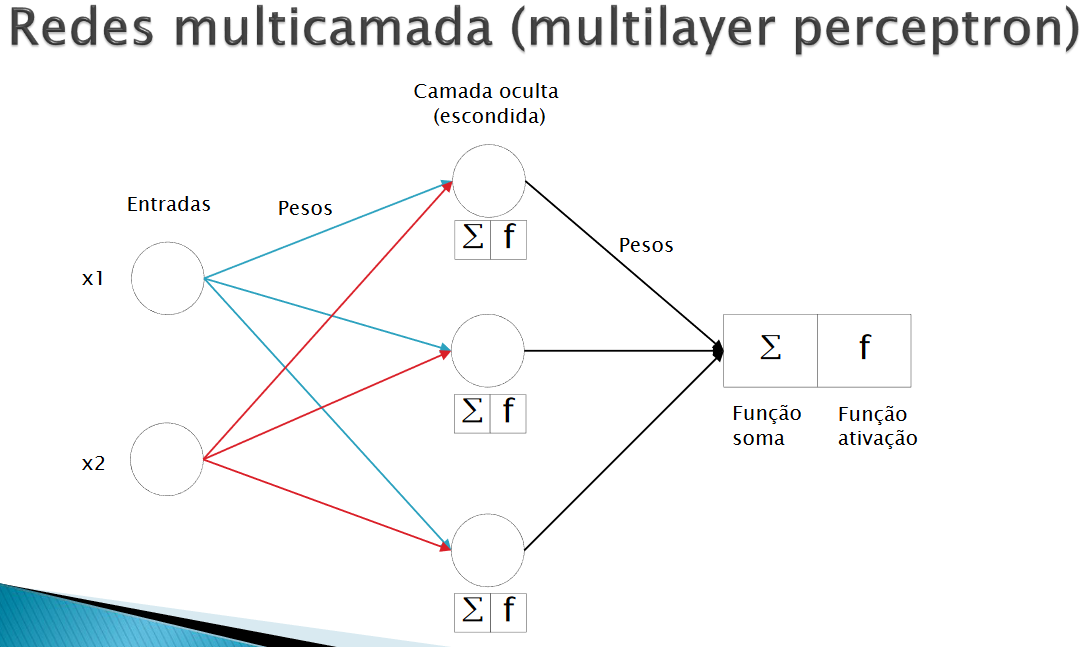

IMPORTANTE: O resultado da função soma é aplicado na função de ativação.

### https://en.wikipedia.org/wiki/Activation_function

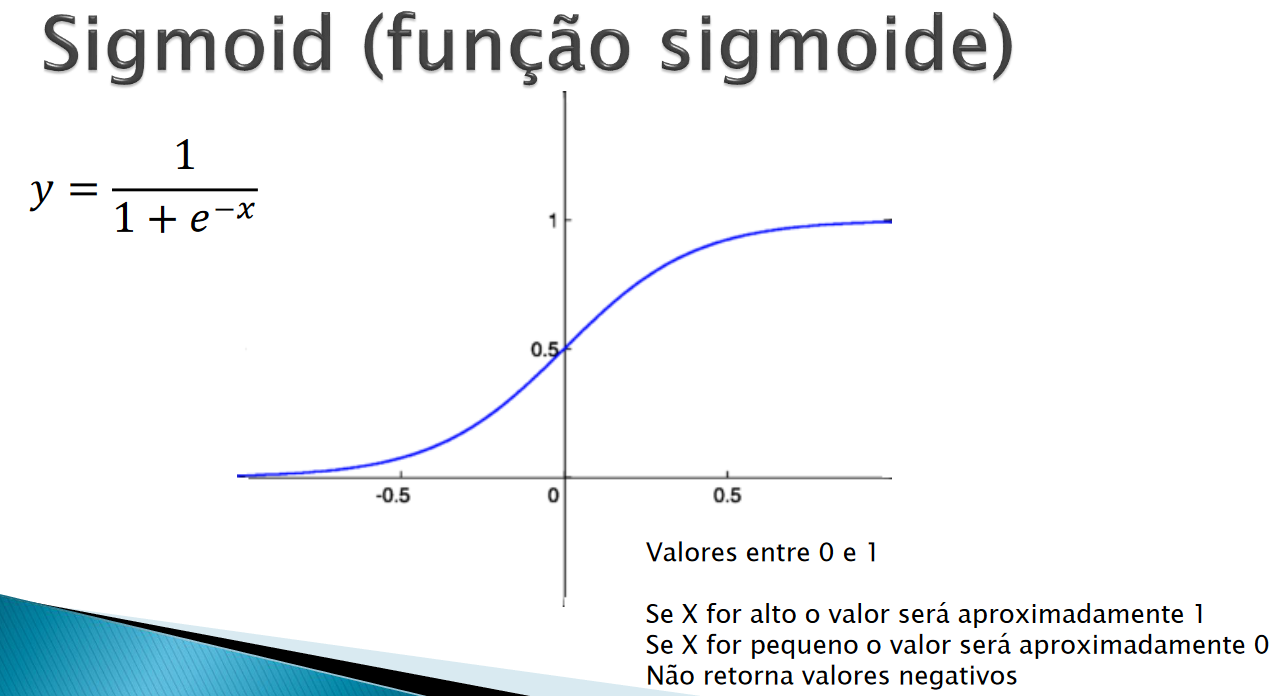

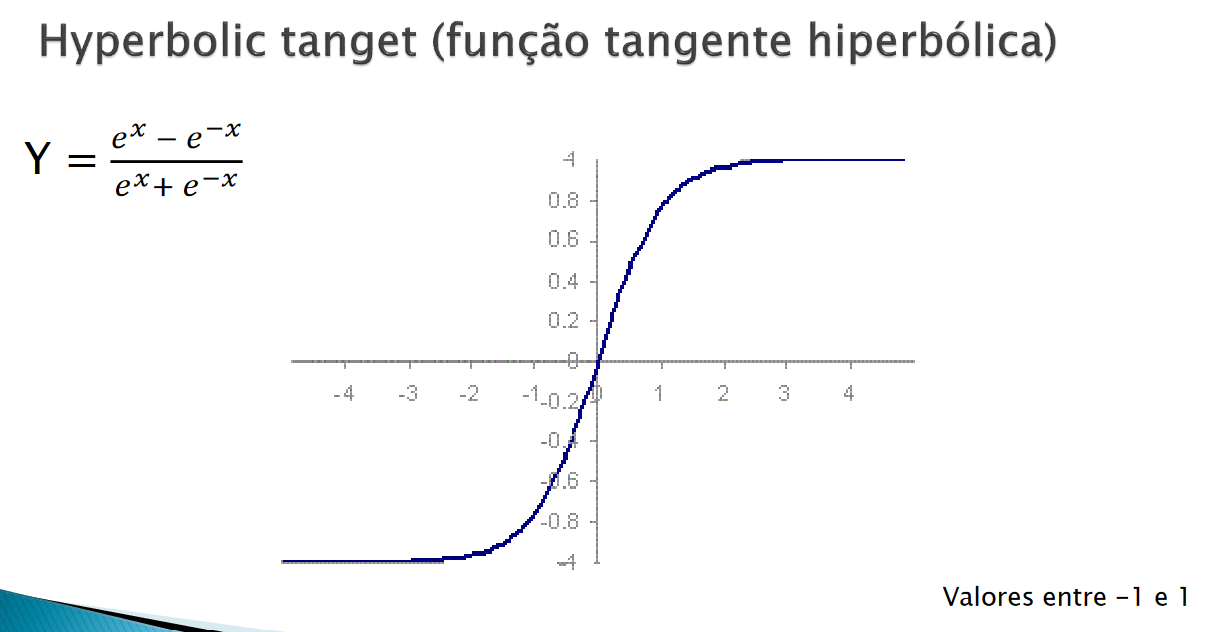

Pequenas variações nas entradas da Step Function mudam drasticamente o resultado final, o que não é bom.

In [1]:
import numpy as np

def sigmoid(soma): 
    return 1 / (1 + np.exp(-soma))

A rede multicamada terá o objetivo de resolver o operador XOR.

Se inicia com um conjunto de pesos aleatórios.

A imagem abaixo é a transmissão dos dados de entrada para as camadas ocultas para uma das combinações de entrada.

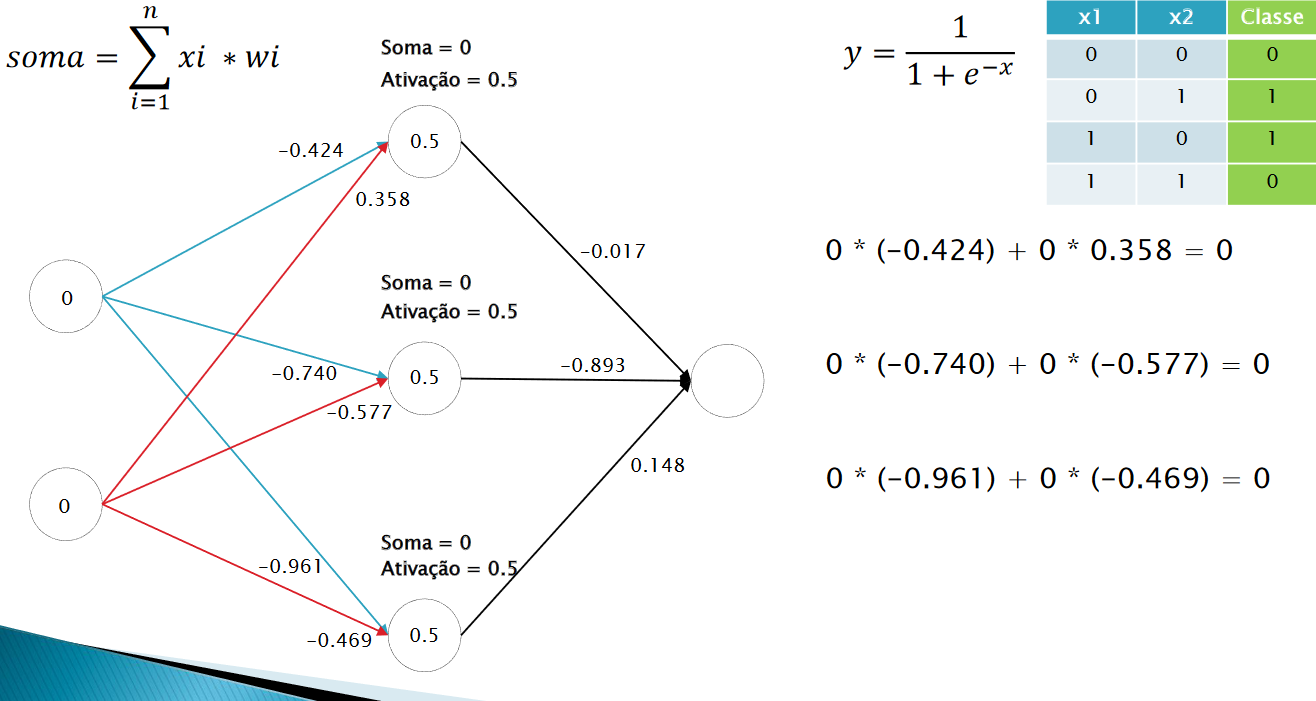

A função de ativação deve ser calculada para cada combinação de entrada em cada camada oculta.

In [2]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saidas = np.array([[0], [1], [1], [0]])

pesos0 = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])
pesos1 = np.array([[-0.017], [-0.893], [0.148]])

epocas = 100

for j in range(epocas):
    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)

    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)

    erroCamadaSaida = saidas - camadaSaida
    mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))



display(somaSinapse0)
display(camadaOculta)
print()
display(somaSinapse1)
display(camadaSaida)

print(f'Média absoluta: {mediaAbsoluta}')


array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

Média absoluta: 0.49880848923713045


### Cálculos camada oculta para camada de saída

Os cálculos a seguir devem ser feitos para cada combinação de entrada.

Cada combinação de entrada vai gerar valores de função de ativação para as camadas ocultas. Cada combinação de camadas ocultas gera um valor de função de ativação para a saída final. Todos esses arranjos devem ser calculados.

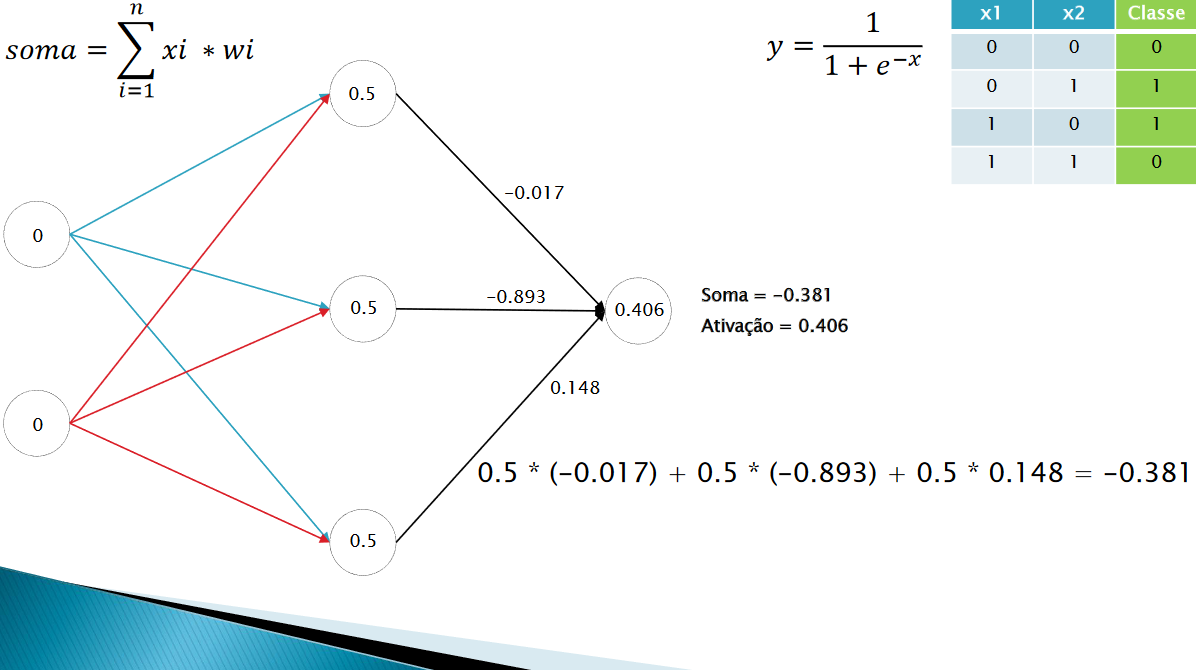

A imagem a seguir é o resultado dos procedimentos para cada combinação de entrada com seu respectivo valor de ativação na saída final.

O objetivo é diminuir ao máximo o valor do erro médio absoluto.

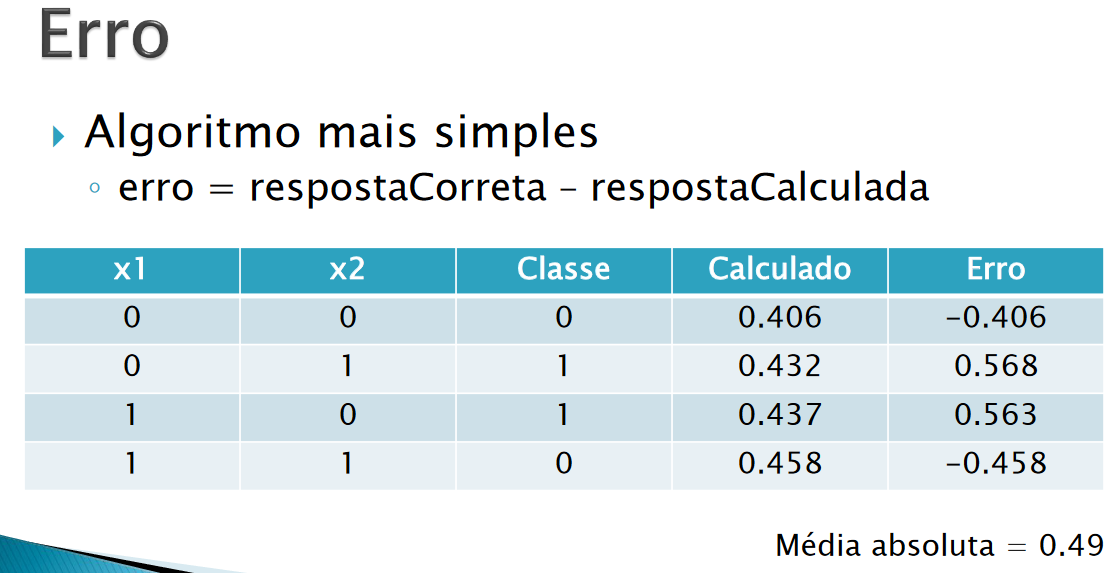

Cost function é a que calcula o erro.

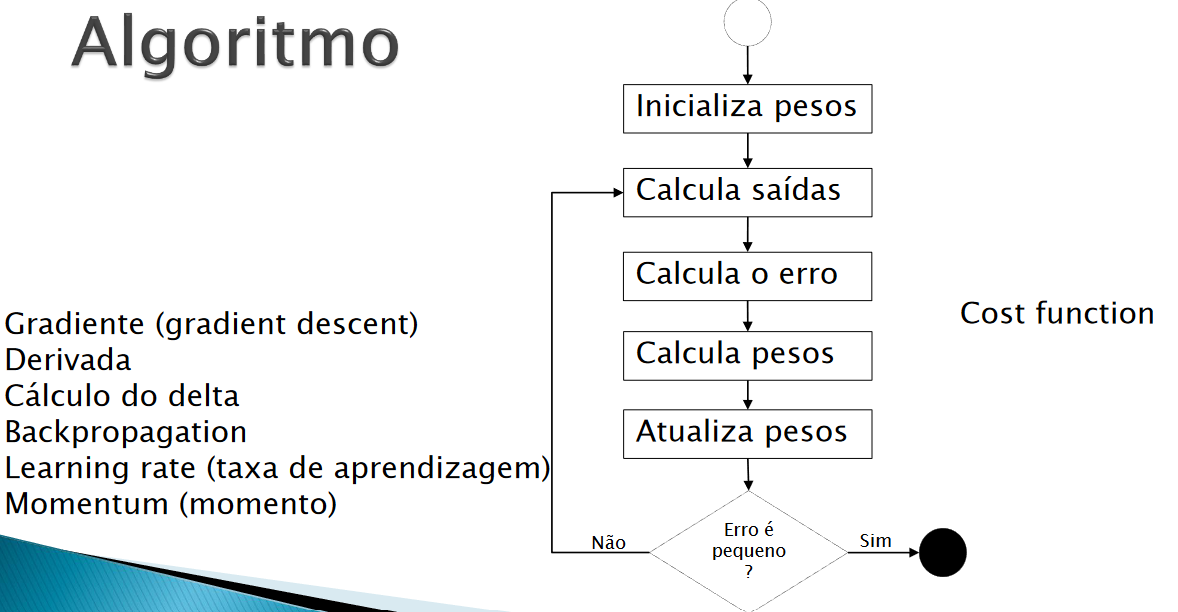

Na imagem a seguir, há uma noção do que é o gradiente. O objetivo é descer no gradiente até chegar no mínimo possível.

Quanto mais baixo, menor o erro. 

O ideal é chegar no mínimo global, não nos locais.

Encontrar a combinação de pesos em que o erro é o menor possível.

### Gradiente é calculado para saber o quanto ajustar os pesos.

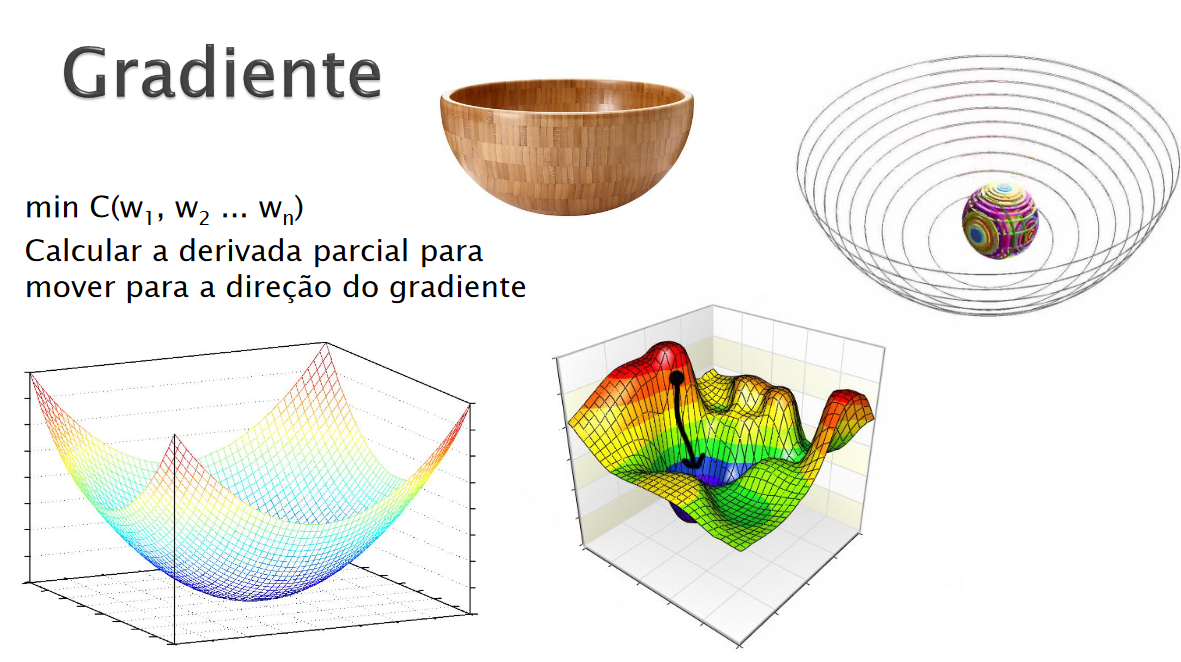

In [3]:
# para y = 1 / (1 + e^-x)
# a derivada é d = y * (1 - y)

def sigmoideDerivada(sig):
    return sig * (1 - sig)

### Cálculo do parâmetro Delta

- Função ativação

- Derivada da função

- Delta

- Gradiente

##### Delta camada saída

O cálculo abaixo deve ser feito para todas as combinações de entrada.

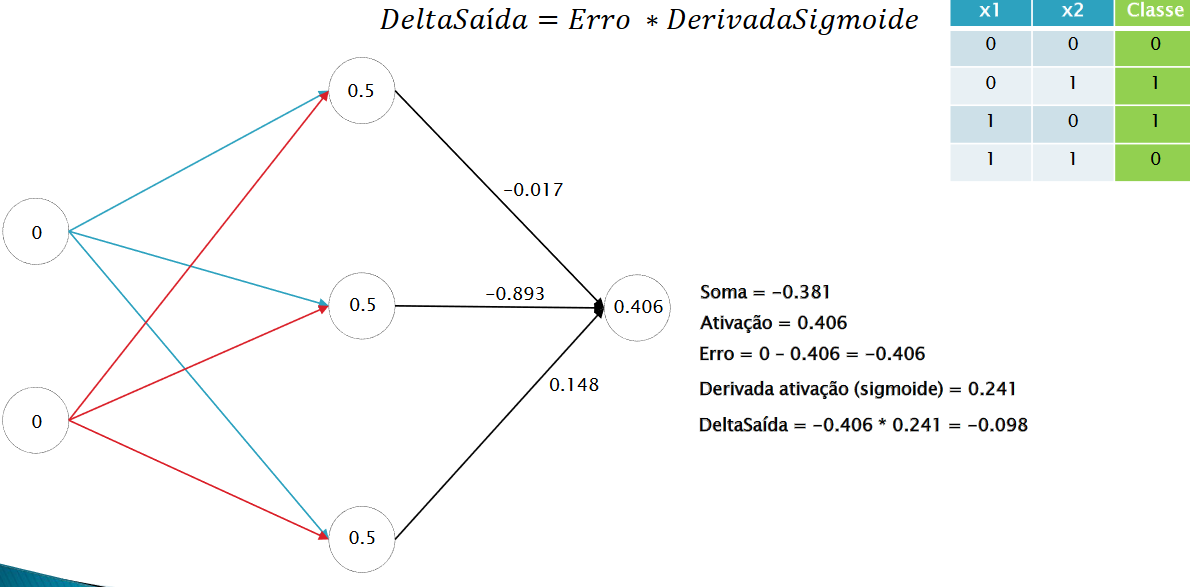

### Delta camada oculta

O cálculo abaixo deve ser feito para todas as combinações de entrada.

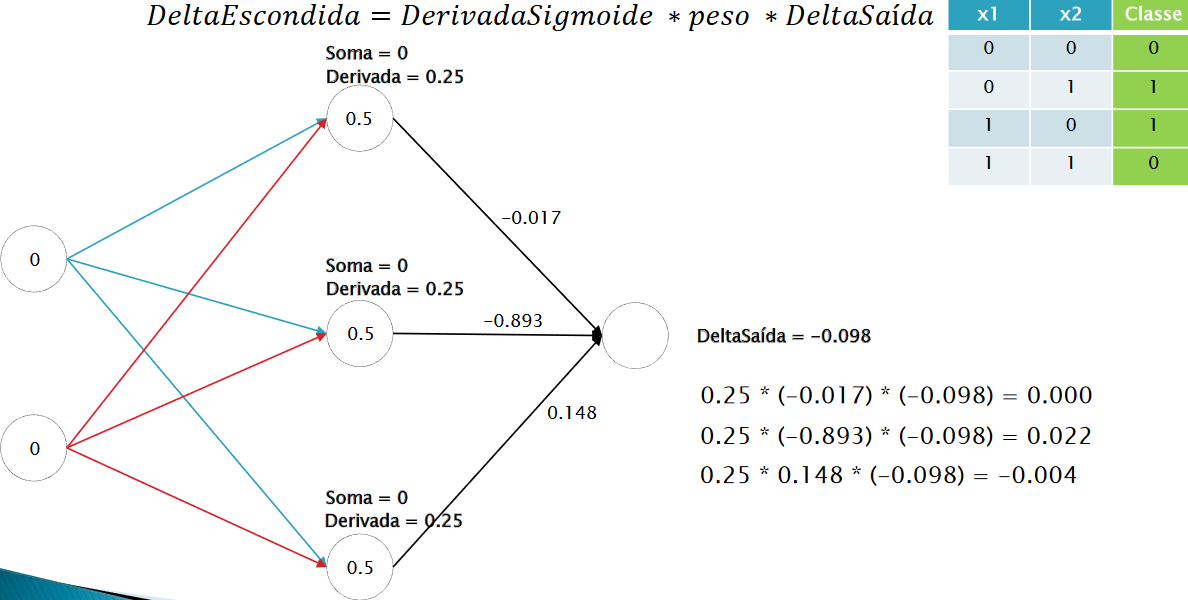

In [4]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saidas = np.array([[0], [1], [1], [0]])

pesos0 = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])
pesos1 = np.array([[-0.017], [-0.893], [0.148]])

epocas = 100

for j in range(epocas):
    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)

    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)

    erroCamadaSaida = saidas - camadaSaida
    mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))

    derivadaSaida = sigmoideDerivada(camadaSaida)
    deltaSaida = erroCamadaSaida * derivadaSaida

    pesos1Transposta = pesos1.T
    deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)
    deltaCamadaOculta = deltaSaidaXPeso * sigmoideDerivada(camadaOculta)



display(somaSinapse0)
display(camadaOculta)
print()
display(somaSinapse1)
display(camadaSaida)
print()

print(f'Média absoluta: {mediaAbsoluta}')

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])


Média absoluta: 0.49880848923713045


### Backpropagation

Se trata da retropropagação para corrigir os valores dos pesos de acordo com os erros.

O momento é mais importante quando os pesos são atualizados a cada registro da base de dados. Na metodologia deste código, toda a base é analisada e só depois os pesos são ajustados.

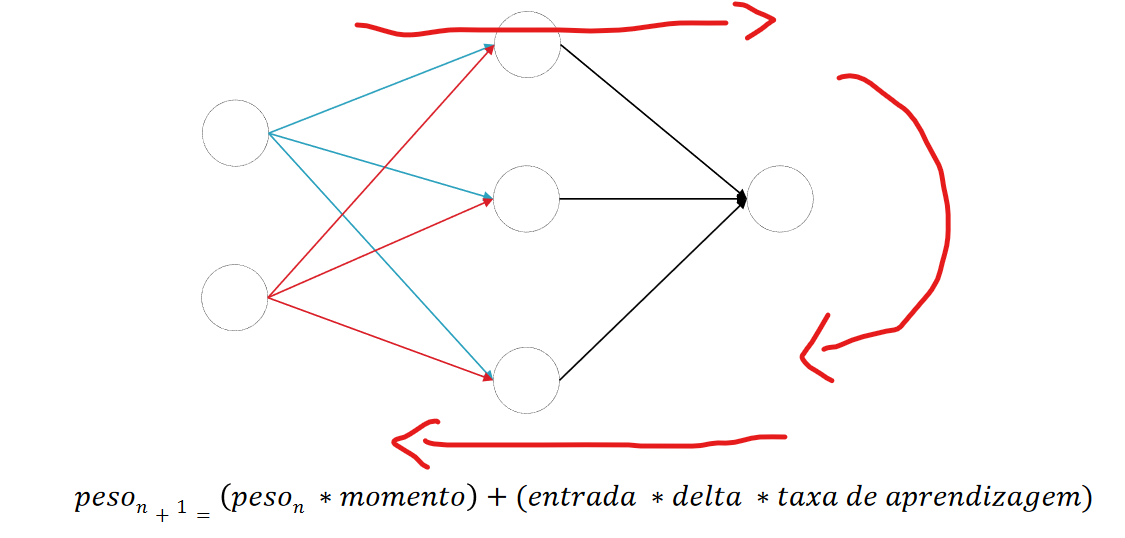

#### Ajuste dos pesos entre as camadas ocultas e a de saída.

O mesmo cálculo abaixo deve ser feito para os outros 2 pesos conectados à camada de saída.

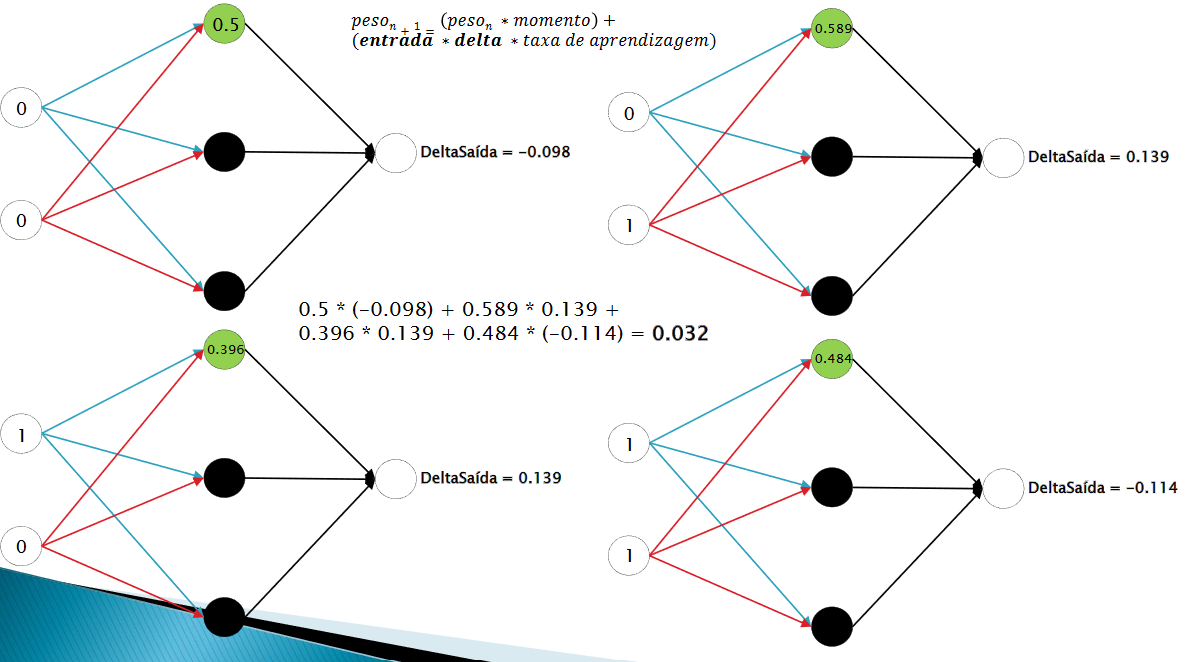

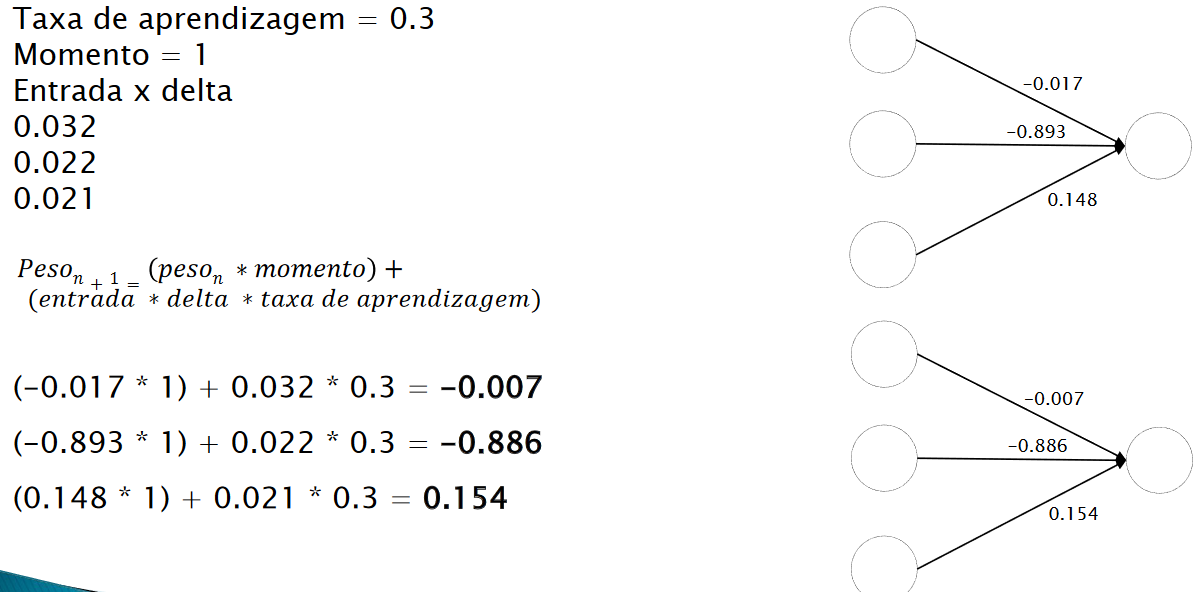

### Ajuste dos pesos entre a camada de entrada e as ocultas

A imagem abaixo traz os cálculos de 2 pesos. O mesmo deve ser feito para os outros 4 pesos.

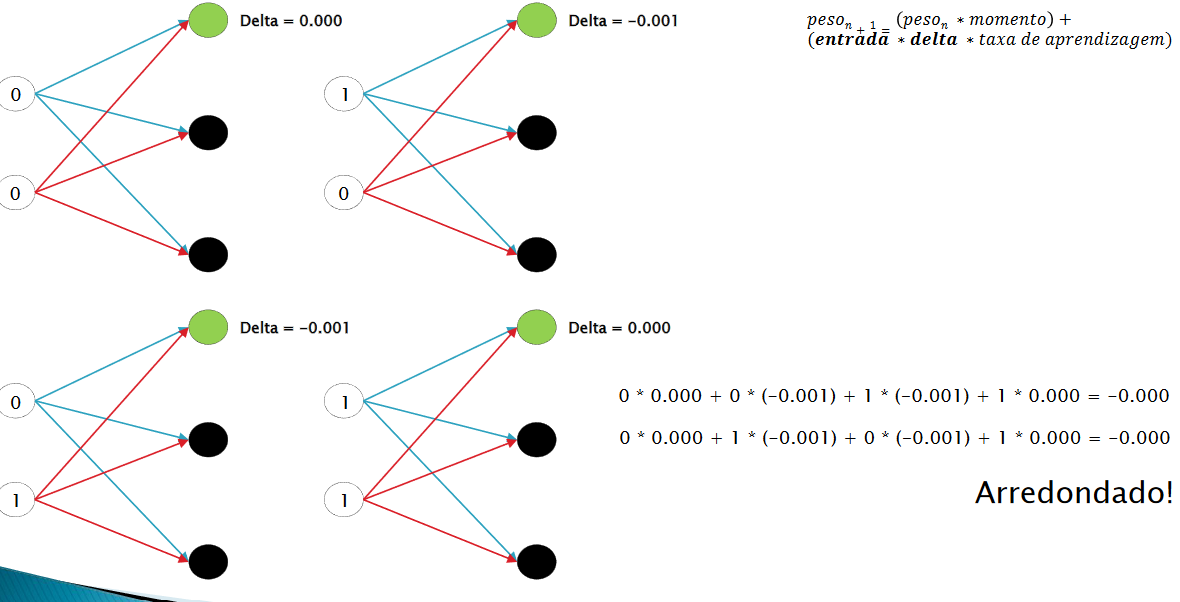

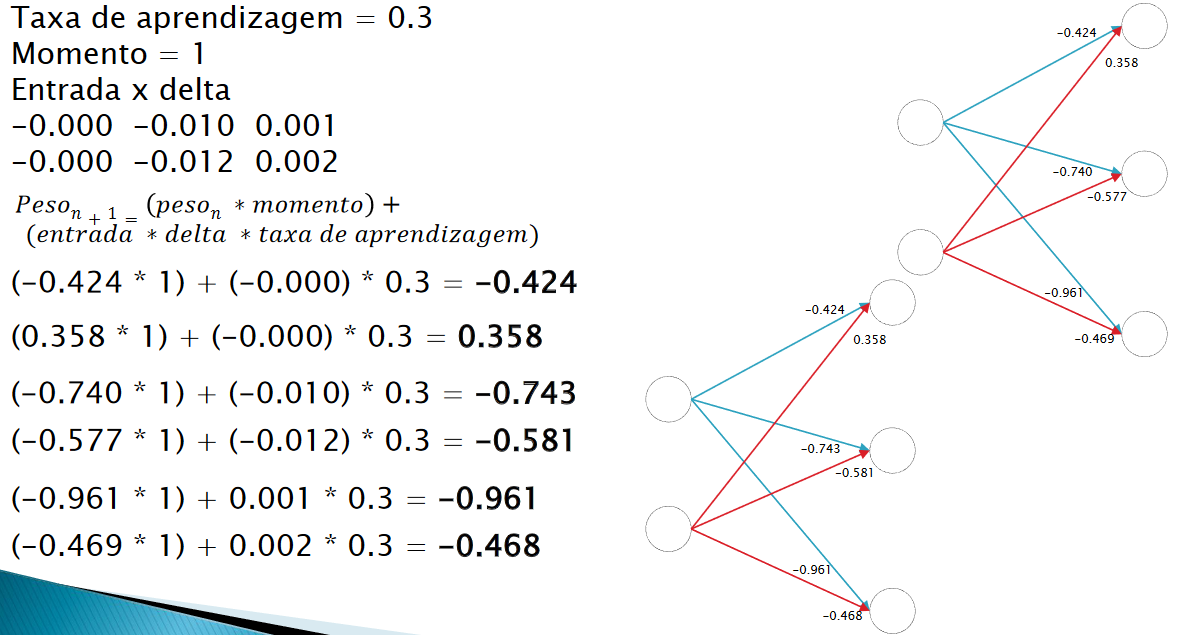

In [5]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saidas = np.array([[0], [1], [1], [0]])

#pesos0 = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])
#pesos1 = np.array([[-0.017], [-0.893], [0.148]])

pesos0 = 2*np.random.random((2,3)) - 1
pesos1 = 2*np.random.random((3,1)) - 1


epocas = 100000
taxaAprendizagem = 0.5
momento = 1

for j in range(epocas):
    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)

    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)

    erroCamadaSaida = saidas - camadaSaida
    mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
    print(f'Erro: {mediaAbsoluta}')

    derivadaSaida = sigmoideDerivada(camadaSaida)
    deltaSaida = erroCamadaSaida * derivadaSaida

    pesos1Transposta = pesos1.T
    deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)
    deltaCamadaOculta = deltaSaidaXPeso * sigmoideDerivada(camadaOculta)

    camadaOcultaTransposta = camadaOculta.T
    pesosNovos1 = camadaOcultaTransposta.dot(deltaSaida)
    pesos1 = (pesos1 * momento) + (pesosNovos1 * taxaAprendizagem)

    camadaEntradaTransposta = camadaEntrada.T
    pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
    pesos0 = (pesos0 * momento) + (pesosNovo0 * taxaAprendizagem)


print(f'Média absoluta: {mediaAbsoluta}')
display(f'Pesos 0: {pesos0}')
display(f'Pesos 1: {pesos1}')
display(f'Saída: {camadaSaida}')

Erro: 0.5013219388914747
Erro: 0.5013234054010152
Erro: 0.5013201931339433
Erro: 0.5013129553709451
Erro: 0.5013022952972217
Erro: 0.5012887632003764
Erro: 0.5012728557371102
Erro: 0.5012550167854952
Erro: 0.5012356394639469
Erro: 0.5012150689637984
Erro: 0.5011936059056684
Erro: 0.5011715099880713
Erro: 0.5011490037484105
Erro: 0.5011262763010395
Erro: 0.5011034869544082
Erro: 0.5010807686398508
Erro: 0.501058231108939
Erro: 0.5010359638753077
Erro: 0.501014038891247
Erro: 0.5009925129599362
Erro: 0.5009714298916939
Erro: 0.5009508224176569
Erro: 0.5009307138774505
Erro: 0.5009111196990977
Erro: 0.5008920486900581
Erro: 0.5008735041581345
Erro: 0.5008554848803309
Erro: 0.5008379859367241
Erro: 0.5008209994251901
Erro: 0.5008045150715106
Erro: 0.500788520748019
Erro: 0.5007730029126225
Erro: 0.5007579469787558
Erro: 0.5007433376256304
Erro: 0.5007291590570339
Erro: 0.5007153952159303
Erro: 0.5007020299612008
Erro: 0.5006890472120461
Erro: 0.5006764310648509
Erro: 0.5006641658866637
Err

'Pesos 0: [[-5.62246135  1.8647453  -9.22667486]\n [-5.60061747 -9.24498076  1.85240486]]'

'Pesos 1: [[-15.1560636 ]\n [  4.14632092]\n [  4.1542203 ]]'

'Saída: [[0.03144087]\n [0.97168059]\n [0.97169026]\n [0.50124634]]'

## EXTRA: BIAS (VIÉS) E ERRO MÉDIO QUADRÁTICO

Não foram usados neste código para assim simplificar os cálculos, mas são importantes para problemas complexos.

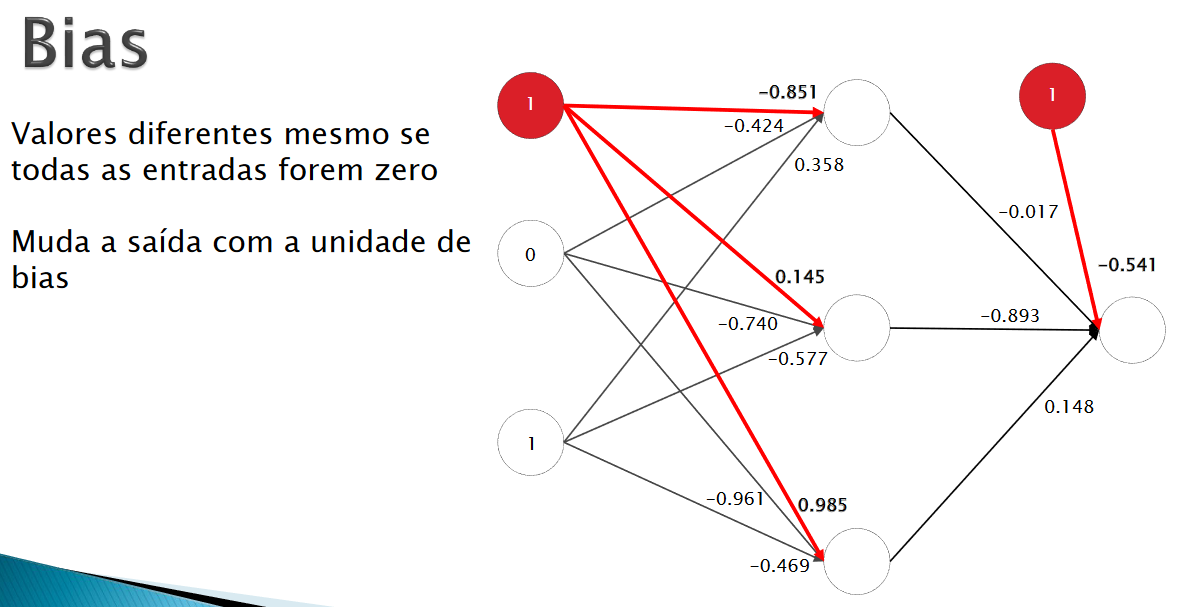

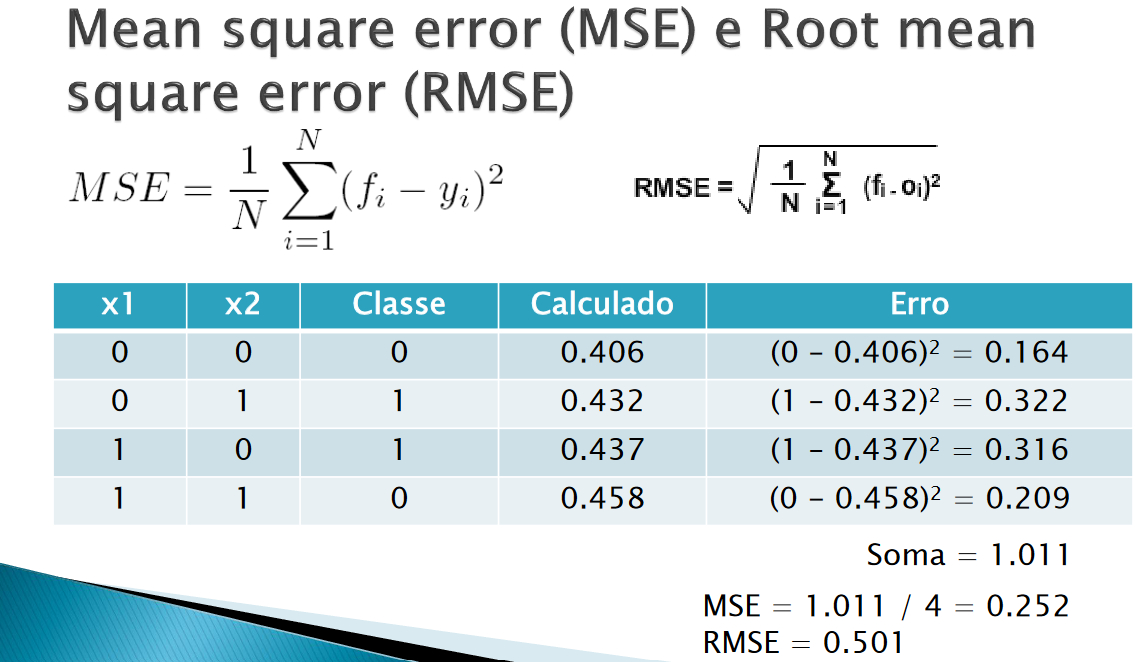

### Quantidade de neurônios nas camadas ocultas

O programador define a quantidade de camadas ocultas.

Problemas linearmente separáveis não precisam de camadas ocultas.

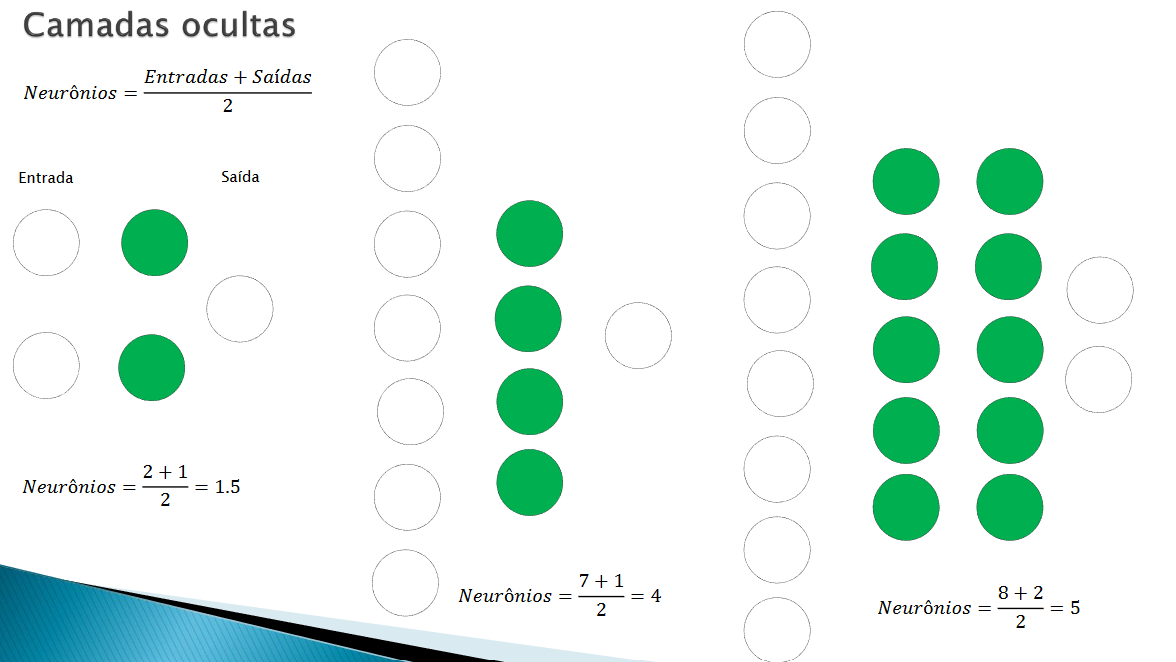

O software Weka Explorer gera redes de banco de dados inseridos pelo usuário.

### Cálculo do erro para camada de saída categórica

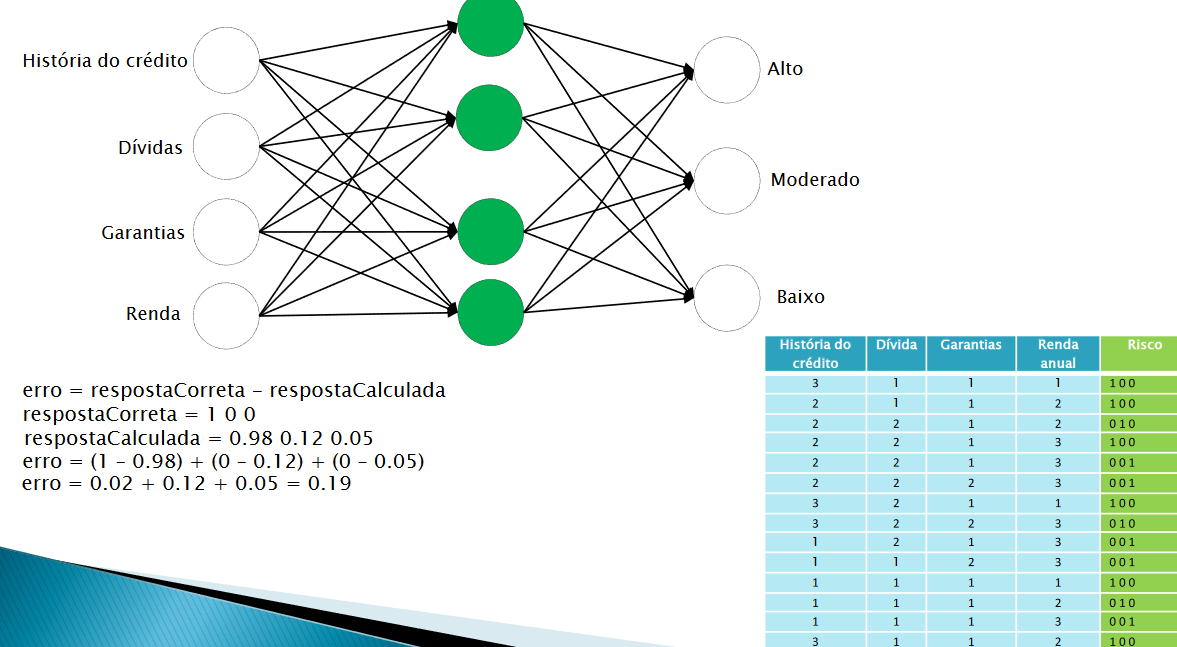

### Diferentes modelos de descida do gradiente

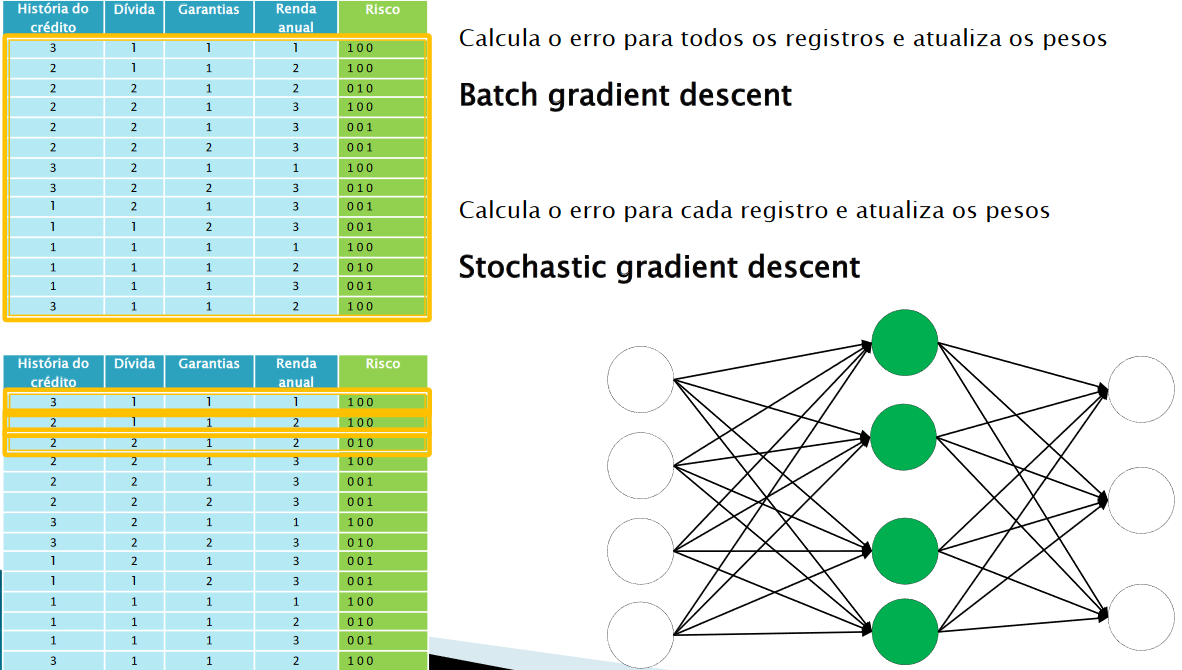

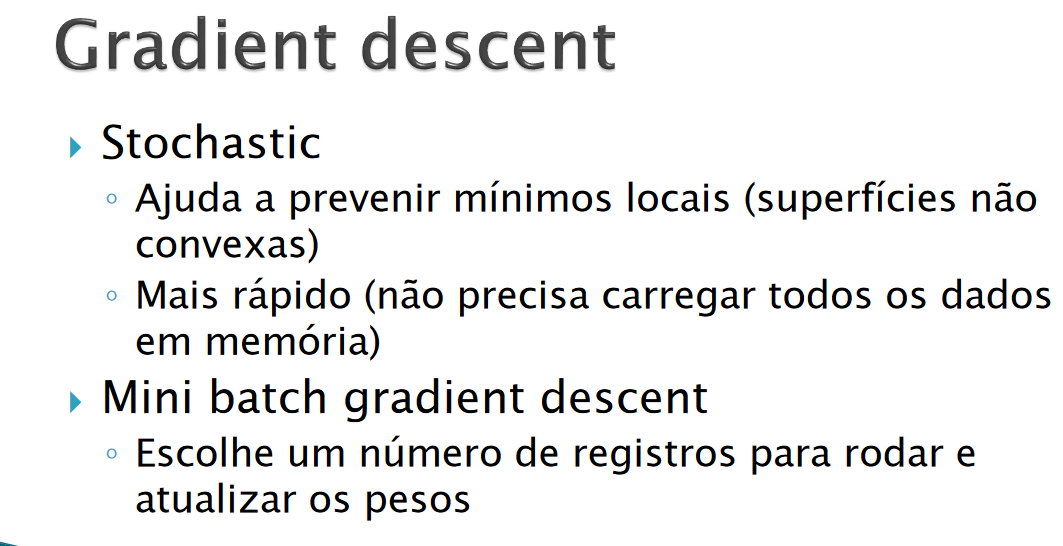